In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn.csv to customer_churn (1).csv


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
#TASK 1
df = pd.read_csv('customer_churn.csv')
# Display basic info
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (7043, 50)
  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0      

In [ ]:
print("Missing values per column:", df.isnull().sum())

Missing values per column: Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Interne

In [ ]:
#handle missing values
# Fill numerical columns with median and categorical columns with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median())
    else:
        df[col].fillna(df[col].mode()[0])

In [ ]:
#to check duplicates
df.drop_duplicates(inplace=True)
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
# Encode categorical features using LabelEncoder
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# to check data is encoded or not
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", list(non_numeric_cols))

Non-numeric columns: []


In [ ]:
#Strandardize numerical values
scaler= StandardScaler()
numerical_cols=df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols].describe())

        Customer ID        Gender          Age      Under 30  Senior Citizen  \
count  7.043000e+03  7.043000e+03  7043.000000  7.043000e+03    7.043000e+03   
mean   5.044319e-19 -2.143835e-17     0.000000  2.421273e-17   -1.614182e-16   
std    1.000071e+00  1.000071e+00     1.000071  1.000071e+00    1.000071e+00   
min   -1.731805e+00 -1.009559e+00    -1.642454 -4.983134e-01   -4.399165e-01   
25%   -8.659024e-01 -1.009559e+00    -0.866296 -4.983134e-01   -4.399165e-01   
50%    0.000000e+00  9.905318e-01    -0.030433 -4.983134e-01   -4.399165e-01   
75%    8.659024e-01  9.905318e-01     0.805430 -4.983134e-01   -4.399165e-01   
max    1.731805e+00  9.905318e-01     1.999519  2.006769e+00    2.273159e+00   

            Married   Dependents  Number of Dependents  Country   State  ...  \
count  7.043000e+03  7043.000000          7.043000e+03   7043.0  7043.0  ...   
mean   7.263819e-17     0.000000         -3.228364e-17      0.0     0.0  ...   
std    1.000071e+00     1.000071       

In [ ]:
#split train and test sets
print(df['Churn Label'].value_counts())
x = df.drop('Churn Label', axis=1)
y = df['Churn Label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(y_train.value_counts())

Churn Label
-0.601023    5174
 1.663829    1869
Name: count, dtype: int64
x_train shape: (5634, 49)
x_test shape: (1409, 49)
y_train shape: (5634,)
y_test shape: (1409,)
Churn Label
-0.601023    4139
 1.663829    1495
Name: count, dtype: int64


Churn Label
-0.601023    73.463013
 1.663829    26.536987
Name: count, dtype: float64


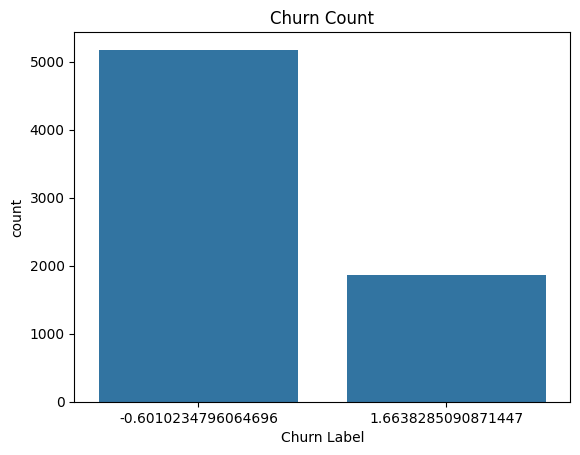

In [ ]:
#TASK 2
# Percentage of customers who churned
churn_counts = df['Churn Label'].value_counts()
churn_percentage = churn_counts / len(df) * 100
print(churn_percentage)
sns.countplot(x='Churn Label', data=df)
plt.title('Churn Count')
plt.show()

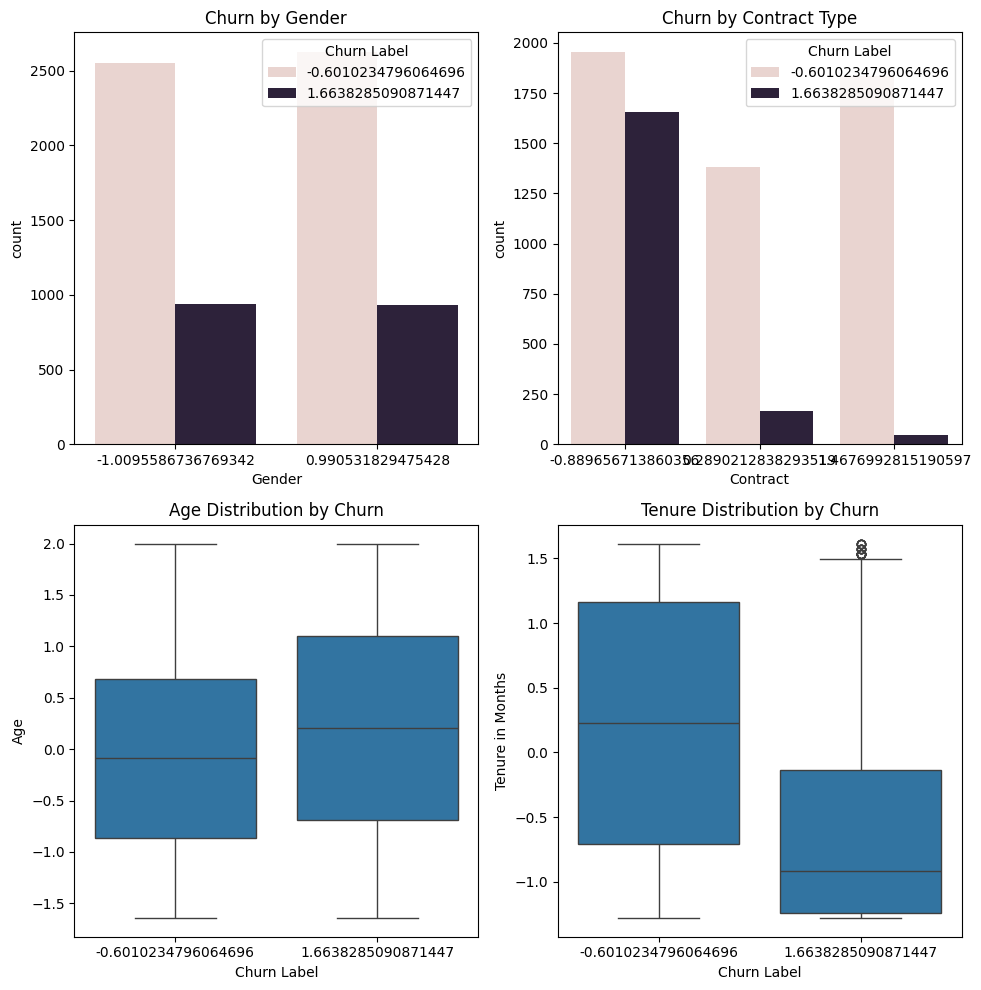

In [ ]:
# how does churn vary by gender,contract,age,tenure
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', hue='Churn Label', data=df)
plt.title('Churn by Gender')
plt.subplot(2, 2, 2)
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title('Churn by Contract Type')
plt.subplot(2, 2, 3)
sns.boxplot(x='Churn Label', y='Age', data=df)
plt.title('Age Distribution by Churn')
plt.subplot(2, 2, 4)
sns.boxplot(x='Churn Label', y='Tenure in Months', data=df)
plt.title('Tenure Distribution by Churn')
plt.tight_layout()
plt.show()

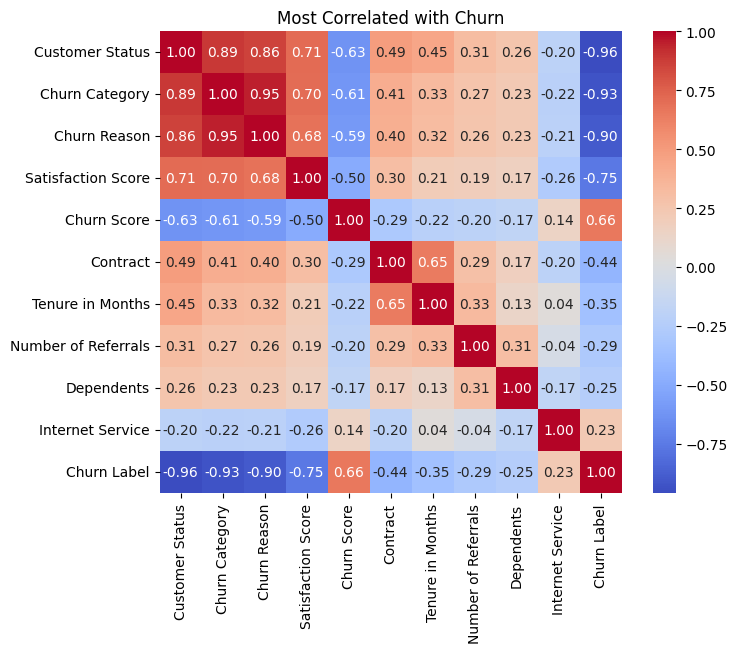

In [ ]:
#Most correlated churn
corr_matrix = df.corr()
churn_corr = corr_matrix['Churn Label'].drop('Churn Label')
top_corr_features = churn_corr.abs().sort_values(ascending=False).head(10)
top_features = top_corr_features.index.tolist() + ['Churn Label']
top_corr_matrix = df[top_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Most Correlated with Churn')
plt.show()

Customer Status      -0.961143
Churn Category       -0.925133
Churn Reason         -0.895444
Satisfaction Score   -0.754649
Contract             -0.435398
Name: Churn Label, dtype: float64


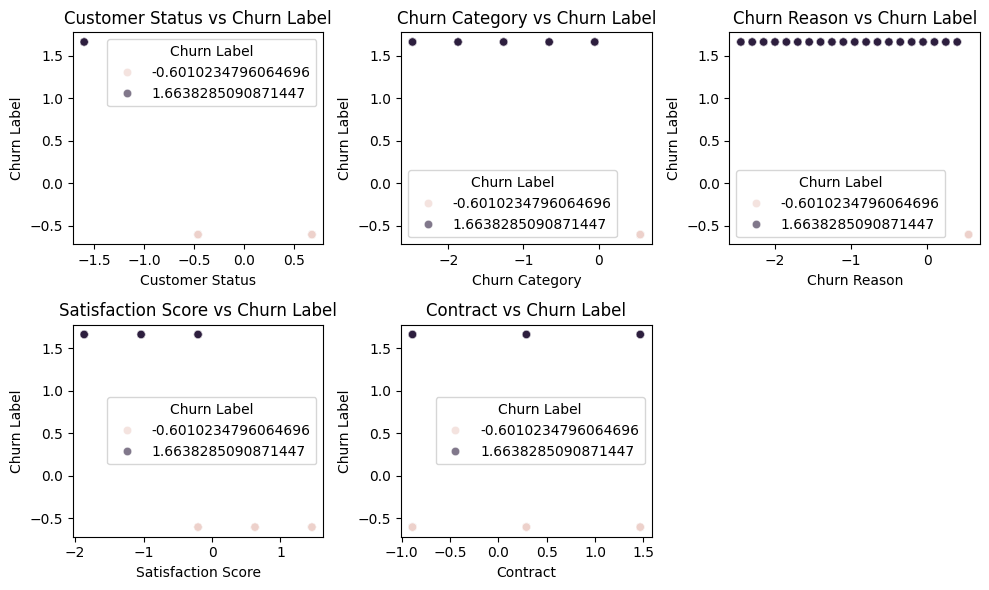

In [ ]:
#top 5 factors influencing customer retention
corr_matrix = df.corr()
churn_corr = corr_matrix['Churn Label']
top_retention_factors = churn_corr[churn_corr < 0].sort_values().head(5)
print(top_retention_factors)
plt.figure(figsize=(10, 6))
for i, feature in enumerate(top_retention_factors.index, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='Churn Label', data=df, hue='Churn Label', alpha=0.6)
    plt.title(f'{feature} vs Churn Label')
plt.tight_layout()
plt.show()

In [ ]:
# Correlation with target
corr = df.corr()['Churn Label'].sort_values(ascending=False)
print("Top features correlated with target:\n", corr.head(10))


Top features correlated with target:
 Churn Label          1.000000
Churn Score          0.660772
Internet Service     0.227890
Monthly Charge       0.193356
Paperless Billing    0.191825
Unlimited Data       0.166545
Offer                0.151112
Senior Citizen       0.150889
Age                  0.115760
Streaming TV         0.063228
Name: Churn Label, dtype: float64


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
leak_features = ['Churn Reason', 'Churn Category', 'Customer Status']
x = df.drop(columns=['Churn Label'] + leak_features)
y = df['Churn Label']

In [ ]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate rows: 0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


x_train shape: (5634, 46)
x_test shape: (1409, 46)
y_train distribution:
 Churn Label
-0.601023    4139
 1.663829    1495
Name: count, dtype: int64
y_test distribution:
 Churn Label
-0.601023    1035
 1.663829     374
Name: count, dtype: int64


In [ ]:
#TASK 3 - Predictive modelling- build and create model , compared by evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.982257   0.972900  0.959893  0.966353
Decision Tree        0.975869   1.000000  0.909091  0.952381
Random Forest        0.972321   0.997033  0.898396  0.945148
XGBoost              0.982257   0.967828  0.965241  0.966533


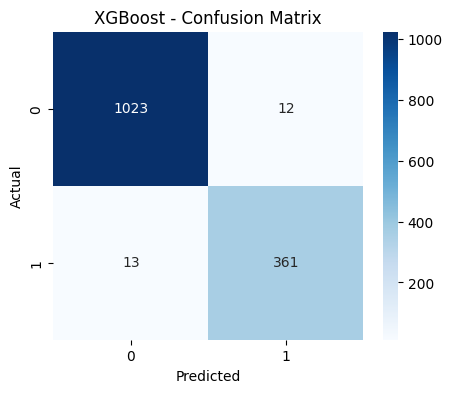

[0 0 0 ... 0 0 0]


In [ ]:
#Confusion Matrix
best_model_name = results_df['F1-score'].idxmax()
best_model = models[best_model_name]
y_pred = best_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'{best_model_name} - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(y_pred)

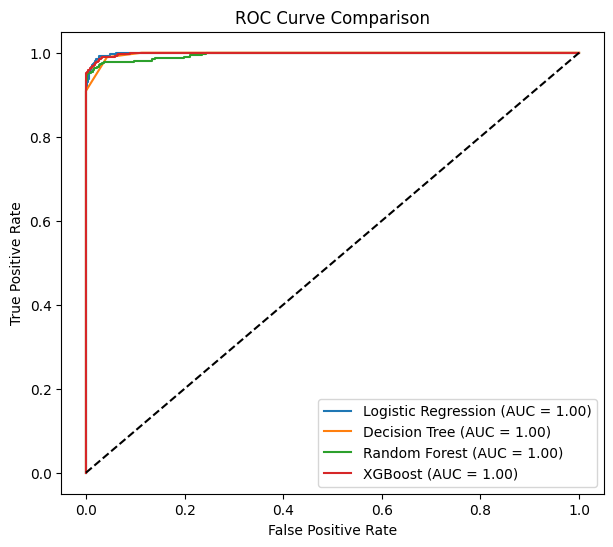

In [ ]:
#ROC and AUC curve
plt.figure(figsize=(7,6))
for name, model in models.items():
    y_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

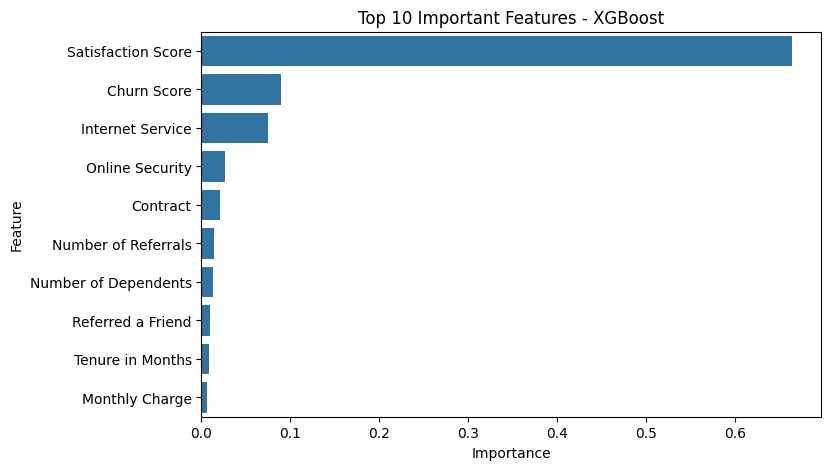

In [ ]:
importances = best_model.feature_importances_
features = x.columns
fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=fi_df.head(10))
plt.title(f'Top 10 Important Features - {best_model_name}')
plt.show()


Contract
-0.889657    0.437295
 0.289021   -0.358465
 1.467699   -0.543290
Name: Churn Label, dtype: float64


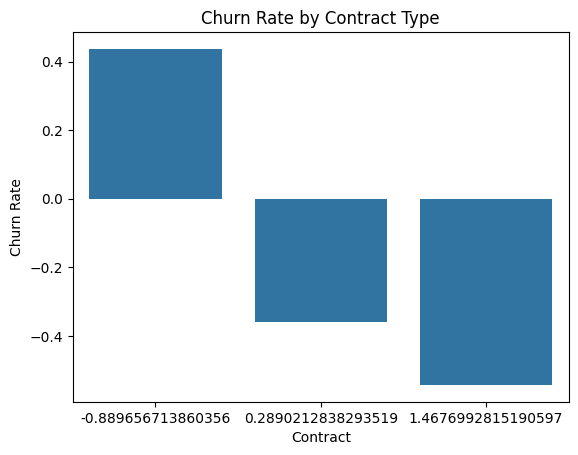

In [ ]:
#TASK 4
# Example: Percentage of churn by contract type
churn_by_contract = df.groupby('Contract')['Churn Label'].mean().sort_values(ascending=False)
print(churn_by_contract)
sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

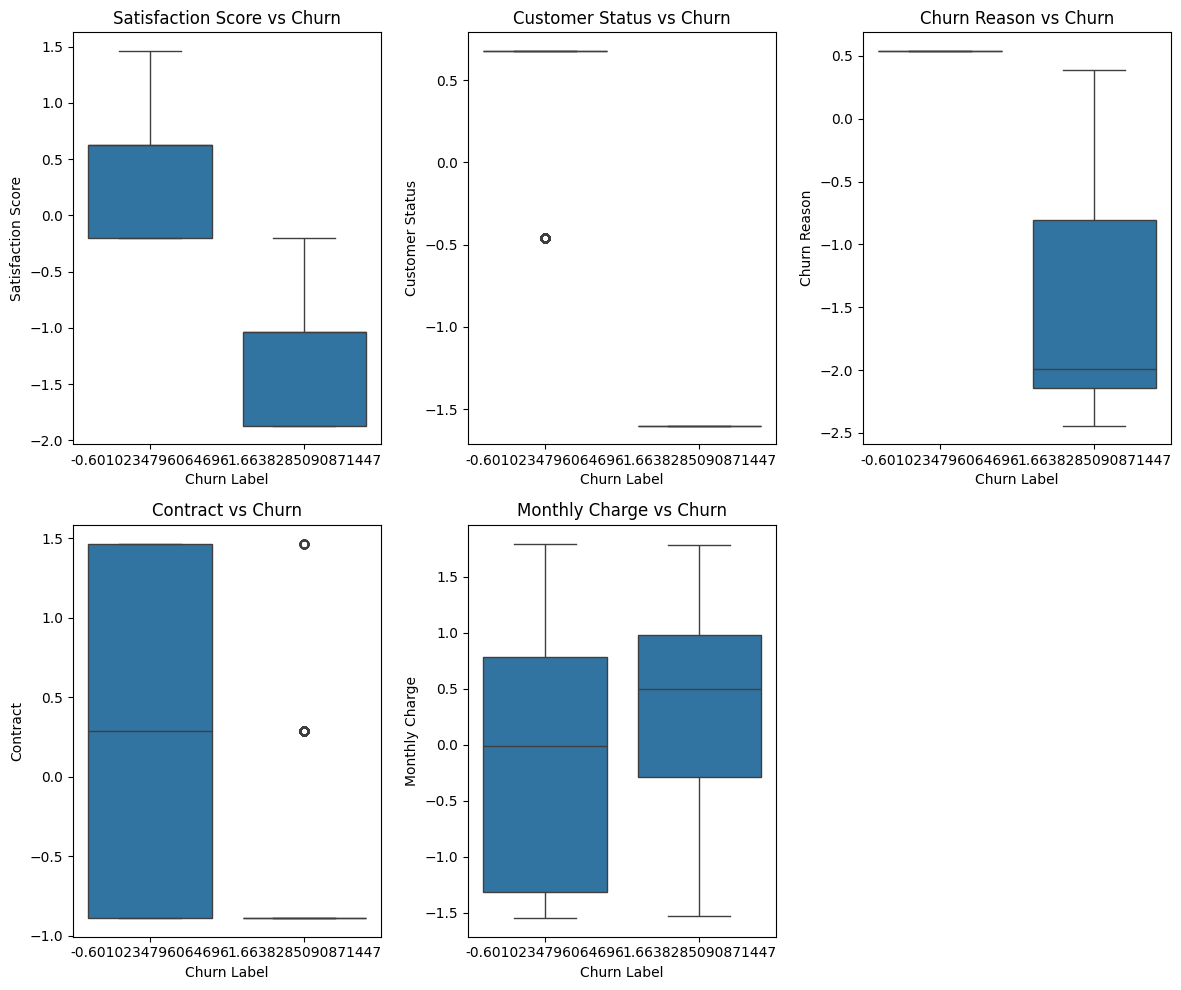

In [ ]:
#Highlight factors driving dissatisfaction.
top_factors = ['Satisfaction Score', 'Customer Status', 'Churn Reason', 'Contract', 'Monthly Charge']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(top_factors, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn Label', y=feature, data=df)
    plt.title(f'{feature} vs Churn')
plt.subplot(2, 3, 6)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('processed_churn_data.csv', index=False)
from google.colab import files
files.download('processed_churn_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>